In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
input_fits='regenerated_sedgrid_pickle_uvi.fits'

In [7]:
hdul = fits.open(input_fits)

In [8]:
hdul.info()

Filename: regenerated_sedgrid_pickle_uvi.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (8005, 12963)   float64   


In [9]:
hdr=hdul[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8005                                                  
NAXIS2  =                12963                                                  
NBSED   =                12962                                                  
NBWLBIN =                 8000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
WLBINWDT=                  1.0                                                  
SEDUNIT = 'FLAM    '                                                            
SEDMODEL= 'pickle_uvi'                                                          
IDX_NUM =                   

In [18]:
index_num=hdr["IDX_NUM"]
index_val=hdr["IDX_VAL"]
#index_temp=hdr["IDX_TEMP"]
#index_logg=hdr["IDX_LOGG"]
#index_logz=hdr["IDX_LOGZ"]
index_spec=hdr["IDX_SPEC"]
#index_mag=hdr["IDX_MAG"]

In [10]:
def plot_sedimg(data):
    plt.figure(figsize=(15,10))   
    img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
    plt.colorbar(img)
    plt.grid(True)
    plt.title('sed grid')
    plt.xlabel('bin number of wavelengths')
    plt.ylabel('sed number')
    plt.show()

In [11]:
def plot_allsed(data):
    plt.figure()   
    
    for idx in np.arange(data.shape[0]-1):
        if data[1+idx,index_val]>0:
            plt.semilogy(data[0,index_spec:],data[1+idx,index_spec:],'-')
    plt.grid(True)
    plt.title('sed')
    plt.xlabel('wavelength (A)')
    plt.ylabel('sed (flam)')
    plt.show()

In [12]:
data = hdul[0].data

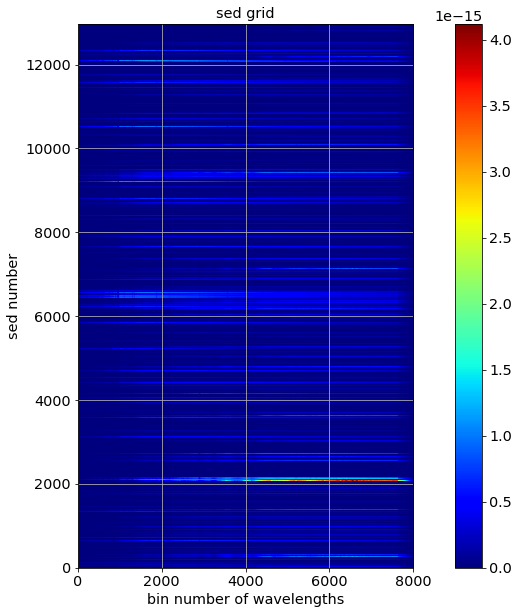

In [16]:
plot_sedimg(data)

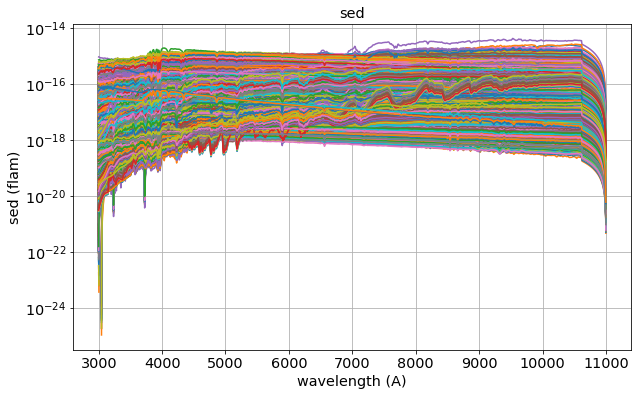

In [19]:
plot_allsed(data)

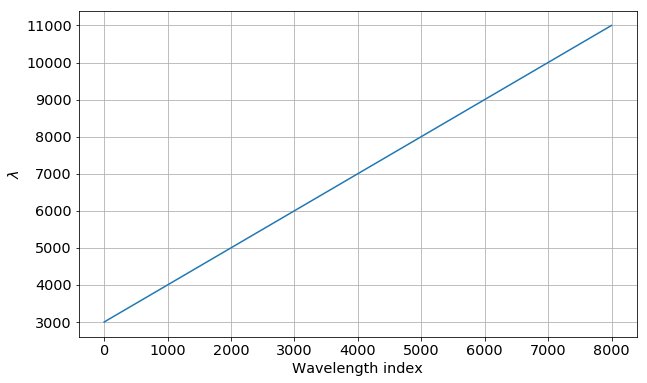

In [20]:
plt.plot(data[0,index_spec:])
plt.grid()
plt.ylabel("$\lambda$")
plt.xlabel("Wavelength index")